# Bipartite Networks

Projection-related exercises, including the generalized similarity

In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import dzcnapy_plotlib as dzcnapy
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

In [9]:
from networkx.algorithms import bipartite
N = pickle.load(open("nutrients.pickle", "rb"))
print(bipartite.is_bipartite(N))

True


Most of the bipartite functions come from the module **nx.algorithm.bipartite**, which you must **import**.

Function **bipartite.sets** splits the nodes of a bipartite network into two parts (and returns two node sets). The function does not look at the node attributes. The separation it performs is based purely on the network topology. It is your responsibility to recognize the meaning of each part. For example, you can check which set contains the vitamin C. The same set must contain all other nutrients.

In [10]:
bip1, bip2 = bipartite.sets(N)
print("C" in bip1, "C" in bip2)

True False


In [11]:
foods, nutrients = (bip2, bip1) if "C" in bip1 else (bip1, bip2)
print(foods, nutrients)

{'Potatoes', 'Green Leafy Vegs', 'Shellfish', 'Eggs', 'Fatty Fish', 'Poultry', 'Seeds', 'Broccoli', 'Nuts', 'Legumes', 'Asparagus', 'Beans', 'Carrots', 'Liver', 'Mushrooms', 'Pumpkins', 'Kidneys', 'Veg Oils', 'Beef', 'Spinach', 'Wheat', 'Tomatoes', 'Milk', 'Whole Grains', 'Cheese', 'Yogurt'} {'E', 'Mn', 'Niacin', 'Cu', 'A', 'D', 'Se', 'Riboflavin', 'B12', 'B6', 'Zn', 'C', 'Ca', 'Thiamin', 'Folates'}


## Projections

Function **bipartite.projected_graph((G,nodeset))** projects a bipartite graph **G** onto the nodes **nodeset** (the nodes must exist in **G** and belong to the same part).

In [12]:
n_graph = bipartite.projected_graph(N, nutrients)
f_graph = bipartite.projected_graph(N, foods)

## Add your calculations here

The resulting network is undirected, unweighted, and unipartite. You can calculate degrees, centralities, and path lengths; extract cliques, cores, and communities; and perform any other complex network analysis of it. The network still contains some knowledge of the connecting nutrients, but the knowledge is implicit. Just like a geometric projection, a network projection is lossy and irreversible (one cannot reconstruct the original bipartite network from one of its projections).

## Preserving Weights after projection

There may be more than one top node connecting a pair of bottom nodes in the same network. You can assign weights to the induced edges to reflect the connection strength by calling the function **bipartite.weighted_projected_graph(G,nodeset,ratio)**. (The last parameter controls whether the weights are absolute or relative.)

In [13]:
fw_graph = bipartite.weighted_projected_graph(N, foods, True)

The following figure shows the weighted induced network of food items connected by the similarity in terms of provided nutrients. It is still undirected and unipartite.

Observe that the induced network is a similarity based one, and that similarities in defined as a function of  **Hamming Distance**! 

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


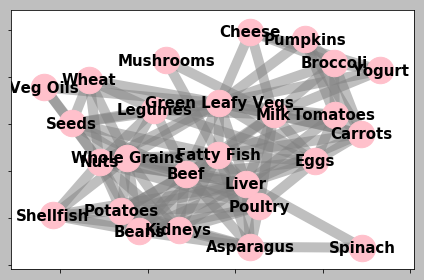

In [14]:
# Edge width represents weights
dzcnapy.attrs["width"] = [d['weight'] * 75 for n1, n2, d in
                          fw_graph.edges(data=True)]
dzcnapy.thick_attrs["width"] = 10

#pos = nx.spring_layout(f_graph)
pos = graphviz_layout(f_graph)
nx.draw_networkx_edges(f_graph, pos, **dzcnapy.thick_attrs)
nx.draw_networkx_nodes(f_graph, pos, **dzcnapy.attrs)
nx.draw_networkx_labels(f_graph, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("projected_foods")


Let’s build a network based on the **Pearson Correlation**. Start by calculating the bi-adjacency matrix. A bi-adjacency matrix is like an **Incidence Matrix**, except that the matrix rows and columns represent the top and bottom nodes, respectively. (You have to tell **NetworkX** which nodes are top and which are bottom by passing the list of bottom nodes as the second parameter.) For each pair of rows, compute the Pearson correlation and arrange the results into a square **Pandas DataFrame food**.

In [15]:
adj = bipartite.biadjacency_matrix(N, f_graph).toarray()
foods = pd.DataFrame([[stats.pearsonr(x, y)[0] for x in adj]
                      for y in adj], columns=f_graph, index=f_graph)

In [16]:
foods

,Potatoes,Green Leafy Vegs,Shellfish,Eggs,Fatty Fish,Poultry,Seeds,Broccoli,Nuts,Legumes,...,Kidneys,Veg Oils,Beef,Spinach,Wheat,Tomatoes,Milk,Whole Grains,Cheese,Yogurt
,,,,,,,,,,,,,,,,,,,,,
Potatoes,1.000000,-0.408248,0.294174,-0.250000,0.000000e+00,5.833333e-01,-2.500000e-01,-0.196116,3.535534e-01,-0.196116,...,0.829156,-0.133631,3.535534e-01,-0.133631,-0.133631,-0.196116,-3.535534e-01,0.075378,-0.133631,-0.133631
Green Leafy Vegs,-0.408248,1.000000,-0.320256,0.272166,-2.886751e-01,-4.082483e-01,2.721655e-01,0.480384,0.000000e+00,0.480384,...,-0.492366,0.327327,-2.886751e-01,-0.218218,0.327327,0.480384,2.886751e-01,-0.184637,0.327327,0.327327
Shellfish,0.294174,-0.320256,1.000000,-0.196116,-2.773501e-01,-1.961161e-01,-1.961161e-01,-0.153846,1.386750e-01,-0.153846,...,0.650444,-0.104828,-2.773501e-01,-0.104828,-0.104828,-0.153846,-2.773501e-01,0.206959,-0.104828,-0.104828
Eggs,-0.250000,0.272166,-0.196116,1.000000,3.535534e-01,1.666667e-01,-2.500000e-01,-0.196116,-3.535534e-01,0.294174,...,-0.301511,-0.133631,3.535534e-01,-0.133631,-0.133631,0.294174,7.071068e-01,-0.301511,-0.133631,-0.133631
Fatty Fish,0.000000,-0.288675,-0.277350,0.353553,1.000000e+00,3.535534e-01,-2.943923e-17,-0.277350,-2.000000e-01,-0.277350,...,-0.106600,-0.188982,4.000000e-01,-0.188982,-0.188982,0.138675,4.000000e-01,-0.106600,-0.188982,-0.188982
Poultry,0.583333,-0.408248,-0.196116,0.166667,3.535534e-01,1.000000e+00,-2.500000e-01,-0.196116,9.813078e-18,-0.196116,...,0.452267,-0.133631,7.071068e-01,-0.133631,-0.133631,-0.196116,-9.813078e-18,-0.301511,-0.133631,-0.133631
Seeds,-0.250000,0.272166,-0.196116,-0.250000,-2.943923e-17,-2.500000e-01,1.000000e+00,-0.196116,7.071068e-01,0.294174,...,-0.301511,0.534522,-9.813078e-18,-0.133631,0.534522,-0.196116,-3.535534e-01,0.452267,-0.133631,-0.133631
Broccoli,-0.196116,0.480384,-0.153846,-0.196116,-2.773501e-01,-1.961161e-01,-1.961161e-01,1.000000,-2.773501e-01,-0.153846,...,-0.236525,-0.104828,-2.773501e-01,-0.104828,-0.104828,0.423077,1.386750e-01,-0.236525,0.681385,0.681385
Nuts,0.353553,0.000000,0.138675,-0.353553,-2.000000e-01,9.813078e-18,7.071068e-01,-0.277350,1.000000e+00,0.138675,...,0.213201,0.377964,1.000000e-01,-0.188982,0.377964,-0.277350,-5.000000e-01,0.533002,-0.188982,-0.188982


In [17]:
SLICING_THRESHOLD = 0.375
stacked = foods.stack()
edges = stacked[stacked >= SLICING_THRESHOLD].index.tolist()
f_pearson = nx.Graph(edges)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


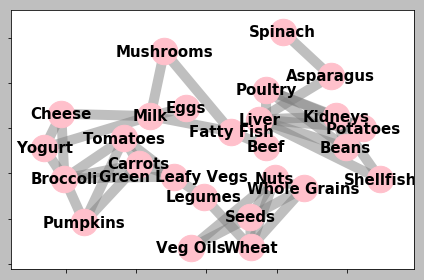

In [12]:
nx.draw_networkx_edges(f_pearson, pos, **dzcnapy.thick_attrs)
nx.draw_networkx_nodes(f_graph, pos, **dzcnapy.attrs)
nx.draw_networkx_labels(f_graph, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("pearson_foods")

The matrix contains the similarities between the bottom nodes with respect to the connectivity to the top nodes. Some similarities are negative; at the very least, you must not convert them into edges. In fact, let’s discard as many potential edges as possible, as long as the network remains connected. In this example, the slicing threshold of 0.375 was chosen by trial and error. Note that this value is still statistically low: one would hardly consider 0.375 a significant correlation!

In [18]:
from generalized import generalized_similarity
bip1, bip2, eps, n_iter = generalized_similarity(N, min_eps=0.001,
                                                 max_iter=100)
foods, nutrients = (bip1, bip2) if "C" in bip2 else (bip2, bip1)
SLICING_THRESHOLD = 0.9
edges_to_remove = [(n1, n2) for n1, n2, d in foods.edges(data=True)
                        if d['weight'] < SLICING_THRESHOLD]
foods.remove_edges_from(edges_to_remove)


After slicing, arrange the surviving edges into a network and plot it. (Call function **nx.from_pandas_dataframe(df,source,target)** if you want to create a weighted network.) The figure shows the correlation-based network of foods. Compared to the previous figure, the network has the same nodes (and in the same locations), but fewer edges.

You can extend the proposed algorithm to project bipartite networks using Euclidean, cosine, and any other reasonably defined distance measure. All of them have a subtle problem: they assume that all the top nodes are independent, and adjacency to each of them is equally important. Sometimes this assumption is correct; sometimes it is not. Consider the nutrients from our dataset. It includes vitamins B6 and B12, niacin (also a vitamin B), and riboflavin (yet another kind of vitamin B). All projection algorithms considered so far treat these four nutrient nodes separately. If a food item provides B6 but not B12 and another item provides B12 but not B6, they are not considered similar. But they would be—if you merged the four specific vitamin B nodes into one umbrella node.

## Compute Generalized Similarities

If you have a strong reason to believe that some top nodes are more similar to each other than the others, you may want to compute the so-called generalized similarity.

Traditionally, two bottom nodes are considered similar if they are adjacent to the same top node or to a set of same top nodes, even though the sameness may be too strict a requirement. Kovacs [Kov10] proposed to weaken the definition of similarity.

The new measure, dubbed “generalized similarity,” treats two bottom nodes as similar if they are adjacent to similar top nodes. But who decides whether two top nodes are similar? It is the reflexive definition of generalized similarity itself: two top nodes are similar if they are adjacent to similar bottom nodes. In fact, the algorithm for calculating the generalized similarity does not care whether a node is top or bottom. It splits a bipartite network into two parts and reports the similarities for each node pair in each class with respect to the nodes in the other class.

The generalized similarity is computed iteratively. The algorithm repeatedly calculates the pairwise Pearson correlations of the nodes in each part of the network, gradually transforming the original Euclidean coordinate system into an affine coordinate system. (The angles between the affine coordinate axes, in general, are not right.) The angles between the axes that represent similar items become more acute; the angles between dissimilar items become more obtuse. (Remember that originally all items are considered independent, that’s why all angles were right.) The Pearson correlation calculated in the new deformed coordinate system better reflects the similarities of the nodes in each network part.

The process is repeated until the affine coordinate system stabilizes and stops morphing. The iterations may take considerable time. You can put a cap either on the maximal number of iterations or the minimal deformation magnitude at each iteration. A perfect solution for a large network (1,000 or more nodes) is usually infeasible, anyway.

Module generalized implements the Kovacs algorithm. You can download the module from GitHub [https://github.com/dzinoviev/generalizedsimilarity] or the book’s website[https://pragprog.com/titles/dzcnapy/source_code] as **generalized.py**.

Module generalized provides only one function **generalized_similarity(G, min_eps=0.01, max_iter=50)**. The function takes a bipartite network and up to two loop termination hints and returns a tuple of four values: two unipartite, undirected, weighted similarity networks; the attained precision; and the number of completed iterations. Start the analysis by calling the function. 

[Kov10] B Kovacs. A Generalized Model of Relational Similarity. Social Networks. 32[3]:197--211, 2010.

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Liberation Sans Narrow'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


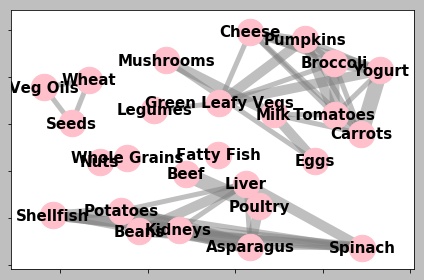

In [19]:
nx.draw_networkx_edges(foods, pos, alpha=0.5, **dzcnapy.attrs)
nx.draw_networkx_nodes(foods, pos, **dzcnapy.attrs)
nx.draw_networkx_labels(foods, pos, **dzcnapy.attrs)
dzcnapy.set_extent(pos, plt)
dzcnapy.plot("generalized_foods")

## Concluding Remarks

The most prominent difference between the latter network and the previous two attempts is the redistribution of graph density from the “center” (Of course networks do not have centers, but still...) to the “periphery”—to the extent that Fatty Fish became an isolate. You can merge it back into the giant component by playing with the SLICING_THRESHOLD at the expense of having less structure in the other parts of the network if you want.

As a free byproduct of the projection, you got a network of the nutrients, nutrients. The twin networks in the generalized similarity analysis problems may have considerable size and waste the precious memory of your computer. If you don’t plan to use them, tell Python: del nutrients.

Bipartite network and networks that consist of more than two parts are much more common in life than one may be inclined to think. Treating a network as bipartite gives you additional CNA tools (various types of projections), adds another dimension to your projects, and empowers you to discover unexpected dependencies between the nodes.